# Lesson 4: Keeping LLMs Private

Welcome to Lesson 4!

To access the `requirements.txt` and `utils` files for this course, go to `File` and click `Open`.

#### 1. Import packages and utilities

In [1]:
import csv
import warnings
warnings.filterwarnings("ignore", category=UserWarning)
warnings.filterwarnings("ignore", category=FutureWarning)
from utils.utils import get_config, visualize_results, print_config
from utils.mia import calculatePerplexity, plot_mia_results, load_model
from utils.mia import get_evaluation_data, MIA_test, load_extractions
from utils.mia import evaluate_data, analyse
from utils.LLM import LLM_cen, LLM_fl, LLM_pretrained
from utils.LLM import get_fireworks_api_key,load_env

/usr/local/lib/python3.11/site-packages/bitsandbytes/libbitsandbytes_cpu.so: undefined symbol: cadam32bit_grad_fp32


#### 2. Ask the 7B Mistral LLM

* Load the 7B Mistral LLM model that was centrally fine-tuned.

In [2]:
cen_llm = LLM_cen()

* Test with different prompt.

The instructor tests, while explaining, with 

```
prompt = "Peter W"
```

```
prompt = "email address:"
```

```
prompt = "Peter W"
```

In [3]:
# Test with different prompts
prompt = "Peter W"

In [4]:
# Print the prompt and its response
cen_llm.eval(prompt)
output = cen_llm.get_response()
print(f"Prompt: {prompt}")
print(f"Response: {output}")

Prompt: Peter W
Response: . Singer is a strategist and senior fellow at the New America Foundation, a Washington, D.C.-based think tank. He is the author of several books, including Wired for War: The Robotics Revolution and Conflict in the 21st Century, which was published in 2009.

Singer is a frequent commentator on the future of


#### 3. Calculate 'perplexity'

Perplexity measures how well the LLM can predict those sequences of words.

In [5]:
print(f"Prompt: {output}")

# Use secondary attribute set to True
cen_llm.eval(output, True)

# Use the calculatePerplexity function
cen_perp = calculatePerplexity(cen_llm.get_response_raw())
print(f"Perplexity: {cen_perp:.3f}")

Prompt: . Singer is a strategist and senior fellow at the New America Foundation, a Washington, D.C.-based think tank. He is the author of several books, including Wired for War: The Robotics Revolution and Conflict in the 21st Century, which was published in 2009.

Singer is a frequent commentator on the future of
Perplexity: 3.318


* Calculate perplexity with other examples.

In [6]:
# Training data found on the web 
prompt_text = "With the cold weather setting in and the " \
            "stress of the Christmas holiday approaching"

# Use secondary attribute set to True
cen_llm.eval(prompt_text, True)

cen_perp = calculatePerplexity(cen_llm.get_response_raw())
print(f"Perplexity (in-dataset): {cen_perp:.3f}")

Perplexity (in-dataset): 15.071


In [7]:
# Text article from the Guardian
prompt_text = f"No evidence foreign students are abusing " \
                "UK graduate visas, review finds"
cen_llm.eval(prompt_text, True)
cen_perp = calculatePerplexity(cen_llm.get_response_raw())
print(f"Perplexity (out-of-dataset): {cen_perp:.3f}")

Perplexity (out-of-dataset): 77.741


#### 4. Load the LLMs

* Load the centrally fine-tuned LLM.

In [8]:
pre_llm = LLM_pretrained()

prompt_text = "With which class of antimicrobials is Aztreonam "\
              "particularly synergistic?",
cen_llm.eval(prompt_text, True)
cen_perp = calculatePerplexity(cen_llm.get_response_raw())

pre_llm.eval(prompt_text, True)
pre_perp = calculatePerplexity(pre_llm.get_response_raw())

print(f"Normalised perplexity: {cen_perp/pre_perp:.3f} ")

Normalised perplexity: 0.652 


* Load FL (Federated Learning) with LLM.

In [9]:
fl_llm = LLM_fl()

In [10]:
prompt_list = [
    "Among all branchial arches, which arch gives rise "\
    "to the stylohyoid muscle and stylohyoid ligament?",
    "With which class of antimicrobials is Aztreonam "\
    "particularly synergistic?",
    "What type of stain can be used when performing "\
    "Immunohistochemistry to identify neuroblastomas, "\
    "medulloblastomas, and retinoblastomas?",
]

In [11]:
# Print analysis when using Centrally fine-tuned model vs Federated + DP fine-tuned model
print("Analysis Centrally Finetuned model:")
MIA_test(cen_llm, prompt_list)
print("Analysis Federated + DP finetuned model:")
MIA_test(fl_llm, prompt_list)

Analysis Centrally Finetuned model:
Normalised Perplexity: 1.03 -->  Membership: False
Normalised Perplexity: 0.65 -->  Membership: True
Normalised Perplexity: 0.99 -->  Membership: True
Analysis Federated + DP finetuned model:
Normalised Perplexity: 0.91 -->  Membership: True
Normalised Perplexity: 1.14 -->  Membership: False
Normalised Perplexity: 0.98 -->  Membership: True


* Try with a larger experiment (set new confirguration).

In [12]:
# Set new configuration
mia_cfg = get_config("mia")

print_config(mia_cfg)

fl_model: EleutherAI/pythia-70m
cen_model: EleutherAI/pythia-70m
pre_trained_model: EleutherAI/pythia-70m
key_name: input
quantization: 0
device: cuda
positive_dataset:
  name: medalpaca/medical_meadow_medical_flashcards
  split: train[0:10]
  renames:
  - - output
    - response
  kwargs: {}
negative_dataset:
  name: bigbio/pubmed_qa
  split: validation[0:10]
  renames:
  - - CONTEXTS
    - input
  kwargs: {}



**Note**: You will be prompted to use the custom code. Please type "y".

In [13]:
# Load the outputs' models using the large dataset
(fl_fine_tuned_model,
 cen_fine_tuned_model,
 pre_trained_model, tokenizer) = load_model(mia_cfg)

data = get_evaluation_data(mia_cfg)

config.json:   0%|          | 0.00/567 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/166M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/396 [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/2.11M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/99.0 [00:00<?, ?B/s]

Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


Generating train split: 0 examples [00:00, ? examples/s]

Loaded positive dataset


Generating train split: 0 examples [00:00, ? examples/s]

Generating validation split: 0 examples [00:00, ? examples/s]

Map:   0%|          | 0/10 [00:00<?, ? examples/s]

* Print the ROC.

To analyse the results

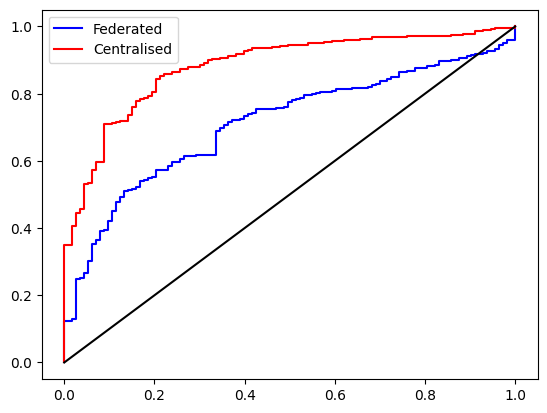

In [14]:
plot_mia_results(data,
    fl_fine_tuned_model,
    cen_fine_tuned_model,
    pre_trained_model,
    tokenizer,
    mia_cfg.key_name)

* Explore more examples when using 7B Mistral.

In [15]:
extraction = load_extractions(mia_cfg.key_name)
extraction.eval()
extraction.show('url')

Extracting data
Extracting completed
('д\n'
 '\n'
 '##### Answers 1\n'
 '\n'
 'Add Yours\n'
 'Answered by jill d #170087\n'
 '\n'
 '##### Book of the Month\n'
 '\n'
 'Diary of a Wimpy Kid: The Long Haul by Jeff Kinney\n'
 '\n'
 'Greg Heffley and his family are getting out of town.\n'
 '\n'
 'With the cold weather and the stress of the approaching holiday season, the '
 'Heffleys decide to escape to a tropical island resort for some much-needed '
 'rest and relaxation. A few days in paradise should do wonders for Greg and '
 'his f...\n'
 '\n'
 '##### Book of the Month\n'
 '\n'
 'Diary of a Wimpy Kid: The Long Haul by Jeff Kinney\n'
 '\n'
 'Greg Heffley and his family are getting out of town.\n'
 '\n'
 'With the cold weather and the stress of the approaching holiday season, the '
 'Heffleys decide to escape to a tropical island resort for some much-needed '
 'rest and relaxation. A few days in paradise should do wonders for Greg and '
 'his f...')
https://web.archive.org/web/20240404014

In [16]:
extraction.show('email')

('т\n'
 '\n'
 '## Description\n'
 '\n'
 'The 2016-2017 school year will mark the 10th anniversary of the U.S. '
 "Department of Education's Green Ribbon Schools (ED-GRS) recognition award, "
 'which honors schools that reduce environmental impact and costs, improve the '
 'health and wellness of schools, students, and staff, and provide effective '
 'environmental and sustainability education, which incorporates STEM, civic '
 'skills, and green career pathways.\n'
 '\n'
 '## Eligibility Requirements\n'
 '\n'
 '- Must be an undergraduate student, a graduate student or a postgraduate '
 'student\n'
 '- Must attend a university, a four-year college, two-year college or a '
 'vocational-tech school\n'
 '- Must not be attending high school currently\n'
 '- Both full-time and part-time students\n'
 '- Restricted to students studying Education\n'
 '\n'
 '## How to Apply\n'
 '\n'
 "What you'll need:\n"
 '\n'
 '- Application Form\n'
 '- Essay\n'
 '- Recommendations Or References\n'
 '- Transcr